In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train=pd.read_csv('sign_mnist_train.csv')
test=pd.read_csv('sign_mnist_test.csv')

In [3]:
print('train shape',str(train.shape),"\n test shape",test.shape)

train shape (27455, 785) 
 test shape (7172, 785)


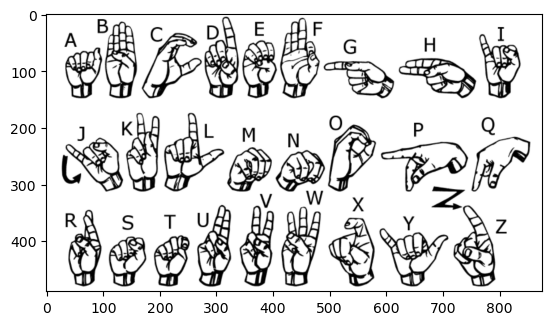

In [4]:
img=plt.imread('american_sign_language.PNG')
plt.imshow(img)

In [6]:
X_train=train.iloc[:,1:].values
y_train=train.label.values

X_train = X_train / 255.0
X_train=np.array(X_train)

In [7]:
num_classes = 26
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

In [8]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.05),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
344/344 [==============================] - 8s 18ms/step - loss: 2.2532 - accuracy: 0.3077 - val_loss: 1.3201 - val_accuracy: 0.5888
Epoch 2/20
344/344 [==============================] - 6s 17ms/step - loss: 1.2394 - accuracy: 0.5913 - val_loss: 0.8085 - val_accuracy: 0.7541
Epoch 3/20
344/344 [==============================] - 6s 17ms/step - loss: 0.8551 - accuracy: 0.7131 - val_loss: 0.6334 - val_accuracy: 0.7880
Epoch 4/20
344/344 [==============================] - 6s 17ms/step - loss: 0.6327 - accuracy: 0.7890 - val_loss: 0.4304 - val_accuracy: 0.8718
Epoch 5/20
344/344 [==============================] - 6s 18ms/step - loss: 0.4607 - accuracy: 0.8484 - val_loss: 0.2489 - val_accuracy: 0.9353
Epoch 6/20
344/344 [==============================] - 6s 17ms/step - loss: 0.3655 - accuracy: 0.8777 - val_loss: 0.1814 - val_accuracy: 0.9550
Epoch 7/20
344/344 [==============================] - 6s 17ms/step - loss: 0.2947 - accuracy: 0.9028 - val_loss: 0.1341 - val_accuracy: 0.9670

In [10]:
X_test=test.iloc[:,1:].values
y_test=test.label.values

X_test = X_test / 255.0
X_test=np.array(X_test)

In [11]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [15]:
model.evaluate(X_test,y_test)

225/225 [==============================] - 1s 5ms/step - loss: 1.0340 - accuracy: 0.7741


[1.0340317487716675, 0.7741215825080872]